<a href="https://colab.research.google.com/github/srinivasachari/human_perception_estimator/blob/main/Human_Perception_Estimator_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import warnings
import random
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')
%matplotlib inline

import tensorflow as tf
import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

!pip install load_img
import load_img as load_img

In [4]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [5]:
!unzip /content/gdrive/MyDrive/mini_project/validation.zip

Streaming output truncated to the last 5000 lines.
 extracting: validation/fear/9040.jpg  
 extracting: validation/fear/9101.jpg  
 extracting: validation/fear/911.jpg  
 extracting: validation/fear/9179.jpg  
 extracting: validation/fear/9205.jpg  
 extracting: validation/fear/9232.jpg  
 extracting: validation/fear/9251.jpg  
 extracting: validation/fear/9261.jpg  
 extracting: validation/fear/9281.jpg  
 extracting: validation/fear/9302.jpg  
 extracting: validation/fear/9333.jpg  
 extracting: validation/fear/9369.jpg  
 extracting: validation/fear/9370.jpg  
 extracting: validation/fear/9474.jpg  
 extracting: validation/fear/949.jpg  
 extracting: validation/fear/9602.jpg  
 extracting: validation/fear/9606.jpg  
 extracting: validation/fear/9842.jpg  
 extracting: validation/fear/9898.jpg  
   creating: validation/happy/
 extracting: validation/happy/10019.jpg  
 extracting: validation/happy/10023.jpg  
 extracting: validation/happy/10074.jpg  
 extracting: validation/happy/1009

In [6]:
!unzip /content/gdrive/MyDrive/mini_project/train.zip

Streaming output truncated to the last 5000 lines.
 extracting: train/sad/30743.jpg     
 extracting: train/sad/30750.jpg     
 extracting: train/sad/30752.jpg     
 extracting: train/sad/30757.jpg     
 extracting: train/sad/30764.jpg     
 extracting: train/sad/30767.jpg     
 extracting: train/sad/30776.jpg     
 extracting: train/sad/3078.jpg      
 extracting: train/sad/30784.jpg     
 extracting: train/sad/30785.jpg     
 extracting: train/sad/30791.jpg     
 extracting: train/sad/30800.jpg     
 extracting: train/sad/30810.jpg     
 extracting: train/sad/30816.jpg     
 extracting: train/sad/3082.jpg      
 extracting: train/sad/30833.jpg     
 extracting: train/sad/30838.jpg     
 extracting: train/sad/30839.jpg     
 extracting: train/sad/30846.jpg     
 extracting: train/sad/30863.jpg     
 extracting: train/sad/30879.jpg     
 extracting: train/sad/30880.jpg     
 extracting: train/sad/30892.jpg     
 extracting: train/sad/30898.jpg     
 extracting: train/sad/30900.jpg     

In [7]:
TRAIN_DIR = "/content/train"
TEST_DIR = "/content/validation"

In [8]:
def load_dataset(directory):
    image_paths = []
    labels = []

    for label in os.listdir(directory):
        for filename in os.listdir(directory+'/'+label):
            image_path = os.path.join(directory,'/'+ label, filename)
            image_paths.append(image_path)
            labels.append(label)

        print(label, "Completed")

    return image_paths, labels

In [9]:
train = pd.DataFrame()
train['image'], train['label'] = load_dataset(TRAIN_DIR)
# shuffle the dataset
train = train.sample(frac=1).reset_index(drop=True)
train.head()

surprise Completed
neutral Completed
happy Completed
sad Completed
fear Completed
disgust Completed
angry Completed


,image,label
0,/neutral/23592.jpg,neutral
1,/neutral/832.jpg,neutral
2,/fear/20759.jpg,fear
3,/neutral/970.jpg,neutral
4,/neutral/14607.jpg,neutral


In [10]:
test = pd.DataFrame()
test['image'], test['label'] = load_dataset(TEST_DIR)
test.head()

surprise Completed
neutral Completed
happy Completed
sad Completed
fear Completed
disgust Completed
angry Completed


,image,label
0,/surprise/25280.jpg,surprise
1,/surprise/35049.jpg,surprise
2,/surprise/23661.jpg,surprise
3,/surprise/9541.jpg,surprise
4,/surprise/23155.jpg,surprise


In [11]:
def extract_features(directory,images):
    features = []
    for image in tqdm(images):
        img = load_img(directory+'/'+image, grayscale=True)
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features), 48, 48, 1)
    return features

In [12]:
train_features = extract_features(TRAIN_DIR,train['image'])

  0%|          | 0/28820 [00:00<?, ?it/s]

In [13]:
test_features = extract_features(TEST_DIR,test['image'])

  0%|          | 0/7066 [00:00<?, ?it/s]

In [14]:
x_train = train_features/255.0
x_test = test_features/255.0

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train['label'])
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [16]:
y_train = to_categorical(y_train, num_classes=7)
y_test = to_categorical(y_test, num_classes=7)

In [17]:
input_shape = (48, 48, 1)
output_class = 7

In [18]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
# output layer
model.add(Dense(output_class, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')

In [ ]:
#@title
history = model.fit(x=x_train, y=y_train, batch_size=128, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
226/226 [==============================] - 28s 60ms/step - loss: 1.8291 - accuracy: 0.2410 - val_loss: 1.8096 - val_accuracy: 0.2583
Epoch 2/100
226/226 [==============================] - 13s 57ms/step - loss: 1.8097 - accuracy: 0.2474 - val_loss: 1.7991 - val_accuracy: 0.2600
Epoch 3/100
226/226 [==============================] - 13s 55ms/step - loss: 1.7747 - accuracy: 0.2622 - val_loss: 1.7215 - val_accuracy: 0.2983
Epoch 4/100
226/226 [==============================] - 13s 56ms/step - loss: 1.7201 - accuracy: 0.2921 - val_loss: 1.6502 - val_accuracy: 0.3401
Epoch 5/100
226/226 [==============================] - 12s 54ms/step - loss: 1.6683 - accuracy: 0.3324 - val_loss: 1.5830 - val_accuracy: 0.3548
Epoch 6/100
226/226 [==============================] - 13s 56ms/step - loss: 1.6028 - accuracy: 0.3646 - val_loss: 1.5152 - val_accuracy: 0.4165
Epoch 7/100
226/226 [==============================] - 12s 55ms/step - loss: 1.5509 - accuracy: 0.3942 - val_loss: 1.4397 - val_ac

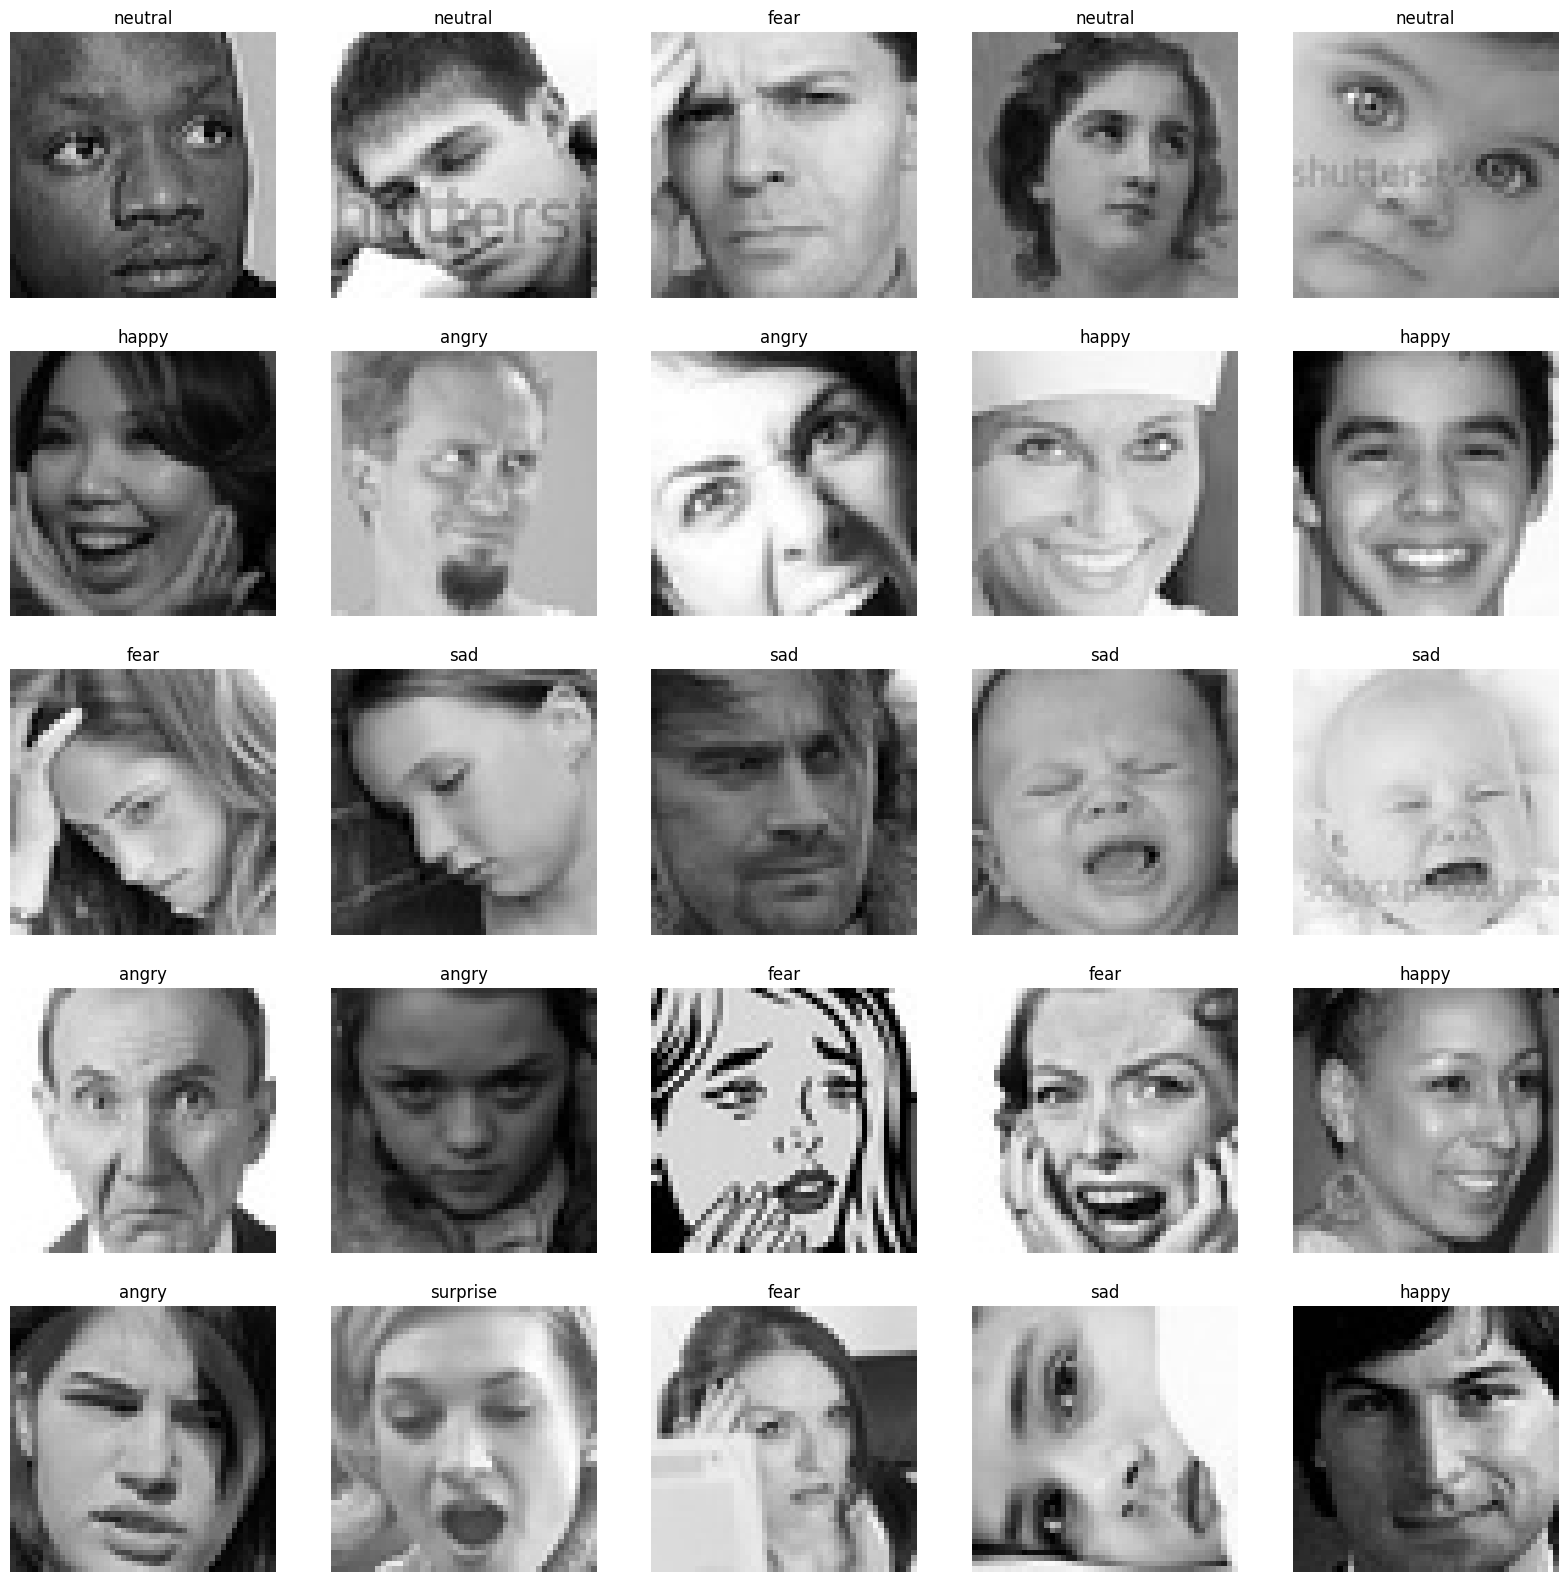

In [22]:
plt.figure(figsize=(20,20))
files = train.iloc[0:25]

for index, file, label in files.itertuples():
    plt.subplot(5, 5, index+1)
    img = load_img(TRAIN_DIR+file)
    img = np.array(img)
    plt.imshow(img)
    plt.title(label)
    plt.axis('off')

Testing model

In [23]:
a=int(input("Enter how many images would you like to predict:"))
for i in range(a):
  image_index = random.randint(0, len(test))
  print("Original Output:", test['label'][image_index])
  pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
  prediction_label = le.inverse_transform([pred.argmax()])[0]
  print("Predicted Output:", prediction_label)

Enter how many images would you like to predict:3
Original Output: angry
1/1 [==============================] - 0s 26ms/step
Predicted Output: angry
Original Output: sad
1/1 [==============================] - 0s 29ms/step
Predicted Output: angry
Original Output: sad
1/1 [==============================] - 0s 27ms/step
Predicted Output: angry
